# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set Units
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # using class example
        response = requests.get(city_url)
        status_code = response.status_code
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt", None)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e: #Advised in class
        print("City not found. Skipping...")
        print(e)

# sleep for api call issues
        time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lagunas
Processing Record 2 of Set 1 | mount isa
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | taiohae
Processing Record 6 of Set 1 | wenchang
Processing Record 7 of Set 1 | kitimat
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | kununurra
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | iskateley
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | cabedelo
Processing Record 17 of Set 1 | celestun
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | mitu
Processing Record 21 of Set 1 | nagqu
Processing Record 22 of Set 1 | grytviken
Processi

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lagunas,-5.2269,-75.6753,93.81,38.0,35.0,1.90,PE,1.717354e+09
1,mount isa,-20.7333,139.5000,40.77,93.0,83.0,4.61,AU,1.717354e+09
2,ribeira grande,38.5167,-28.7000,66.60,88.0,75.0,10.36,PT,1.717354e+09
3,port-aux-francais,-49.3500,70.2167,33.01,69.0,97.0,42.19,TF,1.717354e+09
4,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_ferrier.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_ferrier.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lagunas,-5.2269,-75.6753,93.81,38.0,35.0,1.90,PE,1.717354e+09
1,mount isa,-20.7333,139.5000,40.77,93.0,83.0,4.61,AU,1.717354e+09
2,ribeira grande,38.5167,-28.7000,66.60,88.0,75.0,10.36,PT,1.717354e+09
3,port-aux-francais,-49.3500,70.2167,33.01,69.0,97.0,42.19,TF,1.717354e+09
4,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Data Clean
# create df without null values
clean_df = city_data_df.dropna(how = "any").reset_index()
# check new df
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     567 non-null    int64  
 1   City        567 non-null    object 
 2   Lat         567 non-null    float64
 3   Lng         567 non-null    float64
 4   Max Temp    567 non-null    float64
 5   Humidity    567 non-null    float64
 6   Cloudiness  567 non-null    float64
 7   Wind Speed  567 non-null    float64
 8   Country     567 non-null    object 
 9   Date        567 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 44.4+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

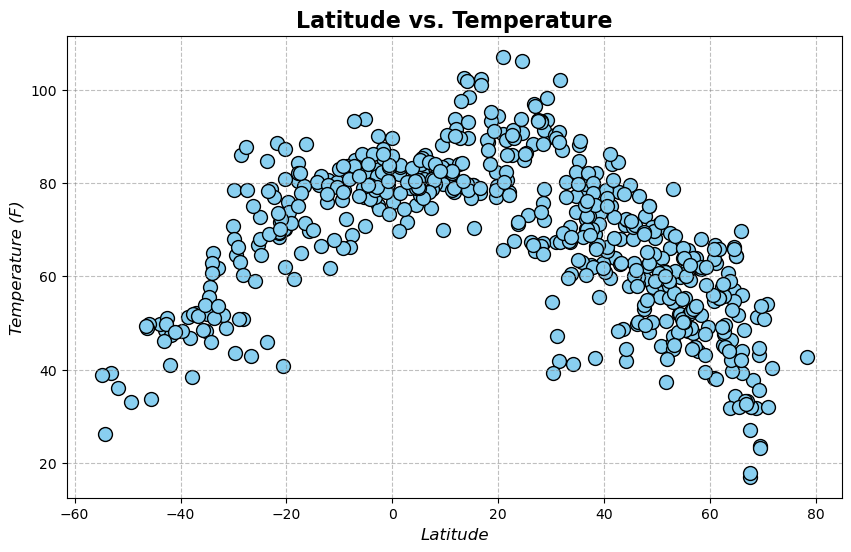

In [23]:
# Build scatter plot for latitude vs. temperature
x = clean_df.Lat
y = clean_df['Max Temp'] # Temp has a space in the df

plt.figure(figsize=(10, 6))

plt.scatter(x, y, facecolor = "#89CFF0", edgecolor = "black", s=100)
plt.xlabel("Latitude", fontsize = 12, fontstyle = "italic")
plt.ylabel("Temperature (F)", fontsize = 12, fontstyle = "italic")
plt.title("Latitude vs. Temperature", fontweight = "bold", fontsize = 16)
plt.grid(color = "grey", linestyle = "--", alpha = 0.5)

# Save and show
plt.savefig("../output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

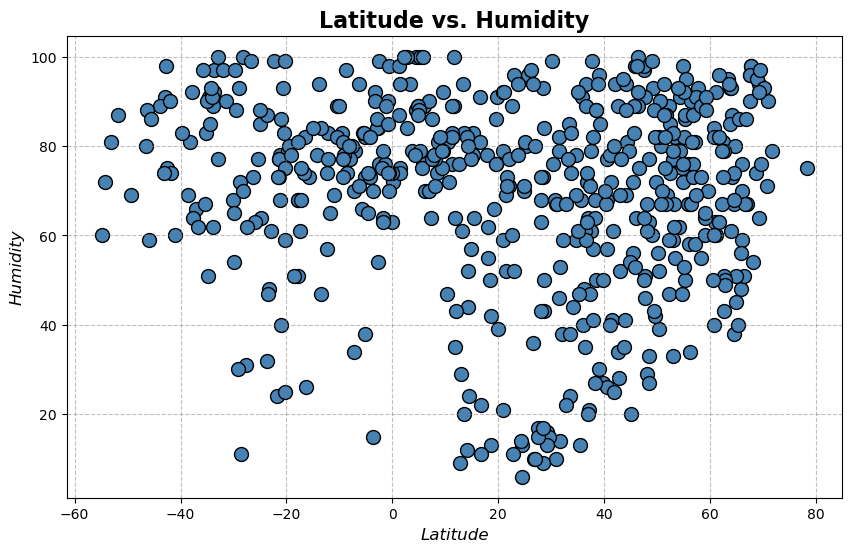

In [27]:
# Build the scatter plots for latitude vs. humidity
x = clean_df.Lat
y = clean_df.Humidity

plt.figure(figsize=(10, 6))

plt.scatter(x, y, facecolor = "#4682B4", edgecolor = "black", s=100)
plt.xlabel("Latitude", fontsize = 12, fontstyle = "italic")
plt.ylabel("Humidity", fontsize = 12, fontstyle = "italic")
plt.title("Latitude vs. Humidity", fontweight = "bold", fontsize = 16)
plt.grid(color = "grey", linestyle = "--", alpha = 0.5)
# Save the figure
plt.savefig("../output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

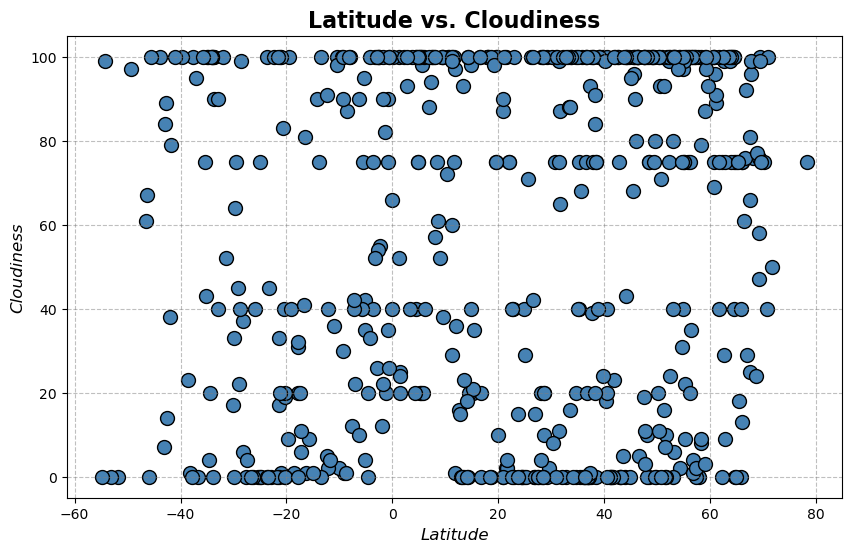

In [28]:
# Build the scatter plots for latitude vs. cloudiness
x = clean_df.Lat
y = clean_df.Cloudiness

plt.figure(figsize=(10, 6))

plt.scatter(x, y, facecolor = "#4682B4", edgecolor = "black", s=100)
plt.xlabel("Latitude", fontsize = 12, fontstyle = "italic")
plt.ylabel("Cloudiness", fontsize = 12, fontstyle = "italic")
plt.title("Latitude vs. Cloudiness", fontweight = "bold", fontsize = 16)
plt.grid(color = "grey", linestyle = "--", alpha = 0.5)
# Save the figure
plt.savefig("../output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

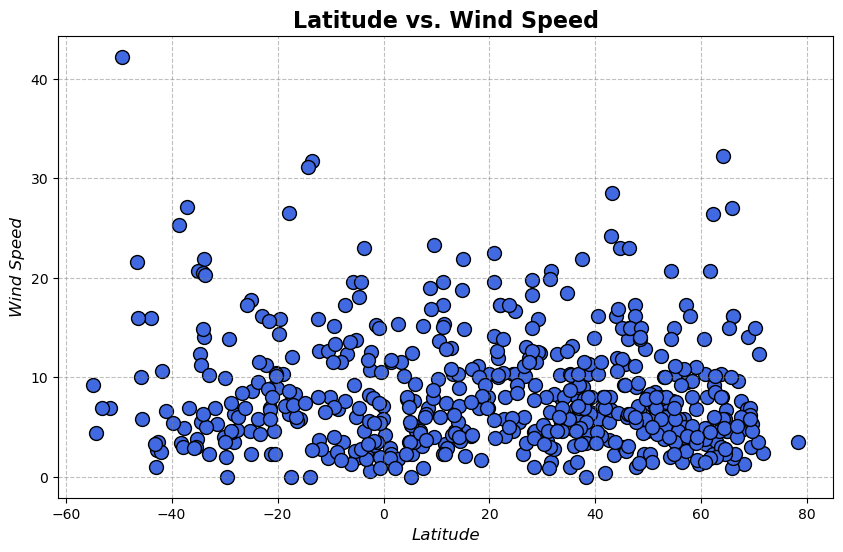

In [30]:
# Build the scatter plots for latitude vs. wind speed
x = clean_df.Lat
y = clean_df['Wind Speed']

plt.figure(figsize=(10, 6))

plt.scatter(x, y, facecolor = "#4169E1", edgecolor = "black", s=100)
plt.xlabel("Latitude", fontsize = 12, fontstyle = "italic")
plt.ylabel("Wind Speed", fontsize = 12, fontstyle = "italic")
plt.title("Latitude vs. Wind Speed", fontweight = "bold", fontsize = 16)
plt.grid(color = "grey", linestyle = "--", alpha = 0.5)
# Save the figure
plt.savefig("../output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
# Modified from class example
def doRegression(x_values, y_values, x_title, y_title, annotation_pos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y" + str(round(slope,2)) + "x +" + str(round(intercept, 2))

    # make plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, facecolor = "#89CFF0", edgecolor = "black", s=100)
    plt.plot(x_values, regress_values, "r-") # line
    plt.xlabel(x_title, fontsize = 12, fontstyle = "italic")
    plt.ylabel(y_title, fontsize = 12, fontstyle = "italic")
    plt.title(f"{x_title} vs. {y_title}", fontweight = "bold", fontsize = 16)
    plt.grid(color = "grey", linestyle = "--", alpha = 0.5)
    plt.annotate(line_eq, annotation_pos, fontsize = 15, color = "black")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = clean_df.loc[clean_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,ribeira grande,38.5167,-28.7000,66.60,88.0,75.0,10.36,PT,1.717354e+09
4,5,wenchang,30.9040,118.4887,67.26,67.0,100.0,3.58,CN,1.717354e+09
5,6,kitimat,54.0524,-128.6534,51.91,62.0,100.0,1.97,CA,1.717354e+09
7,8,bilibino,68.0546,166.4372,37.74,54.0,76.0,1.28,RU,1.717354e+09
10,11,bethel,41.3712,-73.4140,84.02,41.0,0.0,8.05,US,1.717354e+09


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = clean_df.loc[clean_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,lagunas,-5.2269,-75.6753,93.81,38.0,35.0,1.90,PE,1.717354e+09
1,1,mount isa,-20.7333,139.5000,40.77,93.0,83.0,4.61,AU,1.717354e+09
3,3,port-aux-francais,-49.3500,70.2167,33.01,69.0,97.0,42.19,TF,1.717354e+09
6,7,puerto natales,-51.7236,-72.4875,36.05,87.0,0.0,6.91,CL,1.717354e+09
8,9,west island,-12.1568,96.8225,80.58,83.0,40.0,12.66,CC,1.717354e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5813473430792956


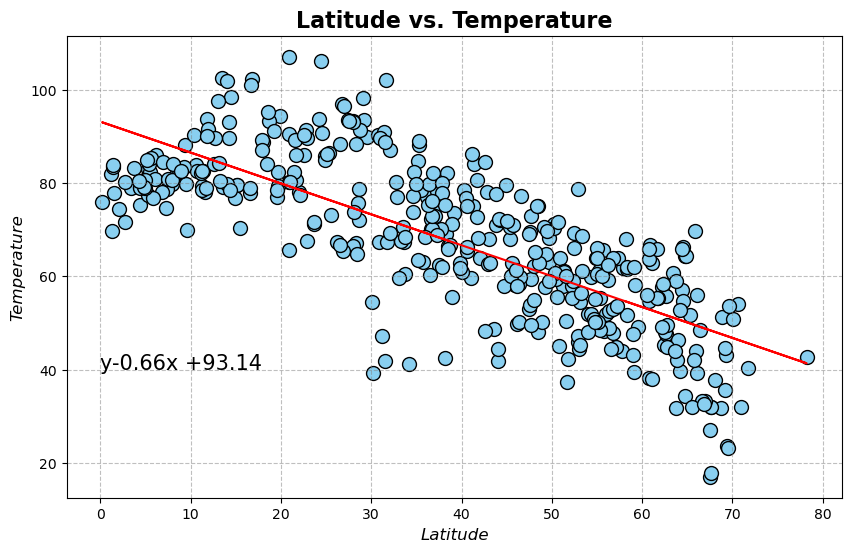

In [42]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df['Max Temp']
doRegression(x_values, y_values, "Latitude", "Temperature", (0,40))

The r-squared is: 0.6862326629879486


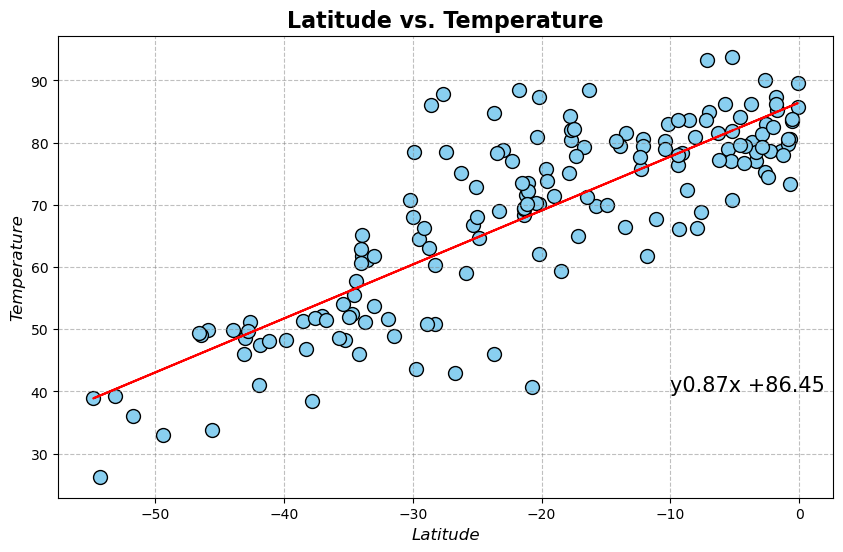

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df['Max Temp']
doRegression(x_values, y_values, "Latitude", "Temperature", (-10,40))

**Discussion about the linear relationship:** The scatterplots show that as you travel away from the equator, temperature will decrease while traveling closer to the equator the temperature will increase. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0029844163155647785


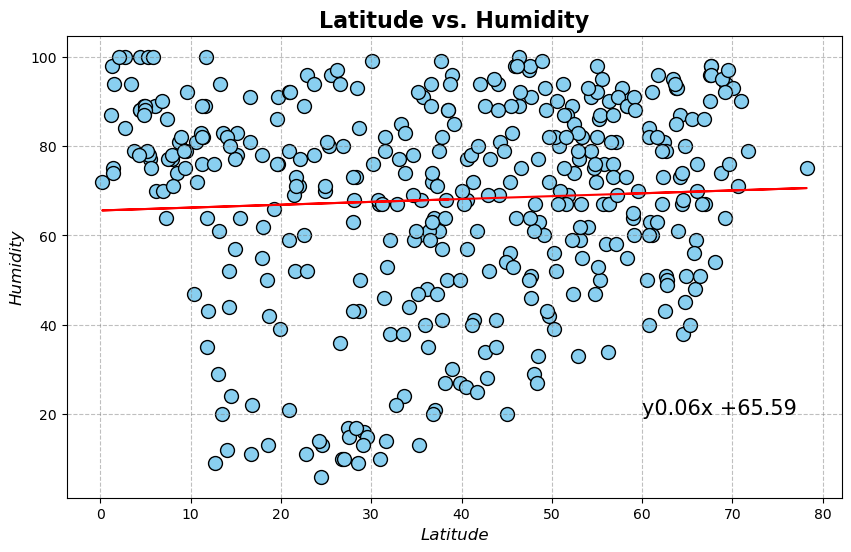

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Humidity
doRegression(x_values, y_values, "Latitude", "Humidity", (60,20))

The r-squared is: 0.002945835501505995


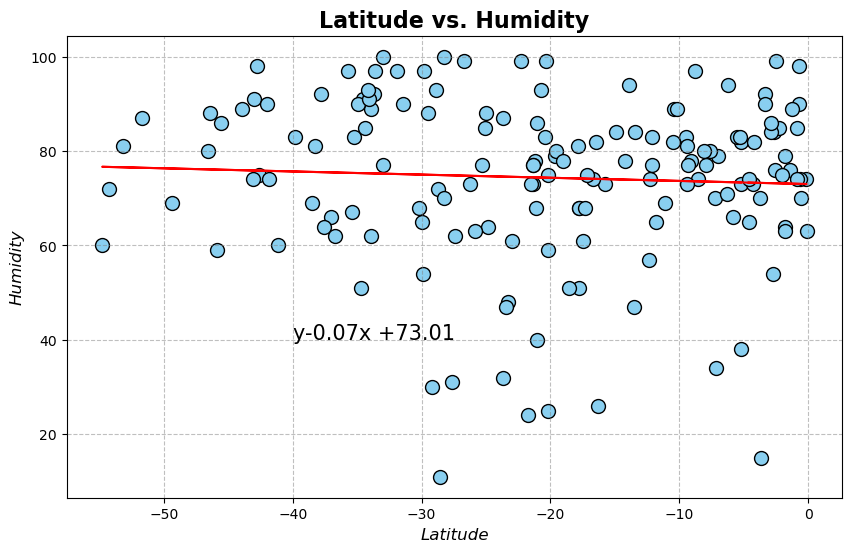

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Humidity
doRegression(x_values, y_values, "Latitude", "Humidity", (-40,40))

**Discussion about the linear relationship:** according to this data there is no strong relation between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.005377615911273474


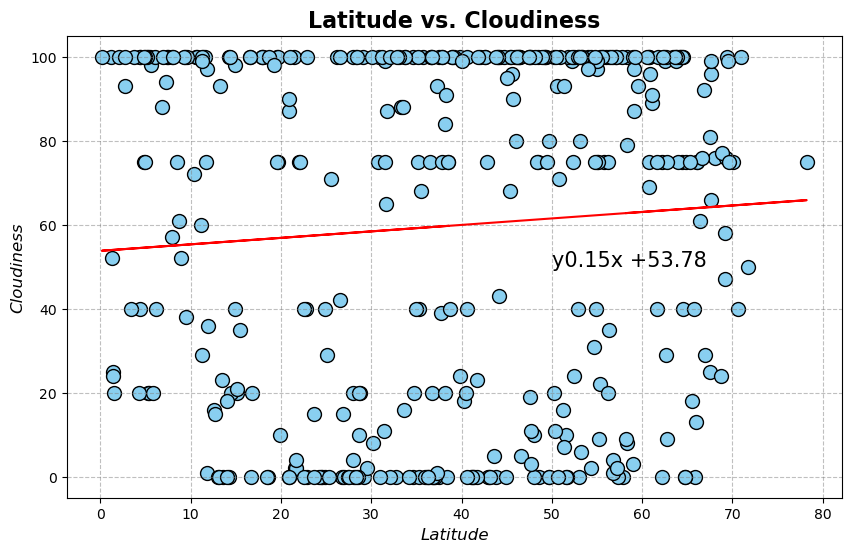

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness
doRegression(x_values, y_values, "Latitude", "Cloudiness", (50,50))

The r-squared is: 0.005377615911273474


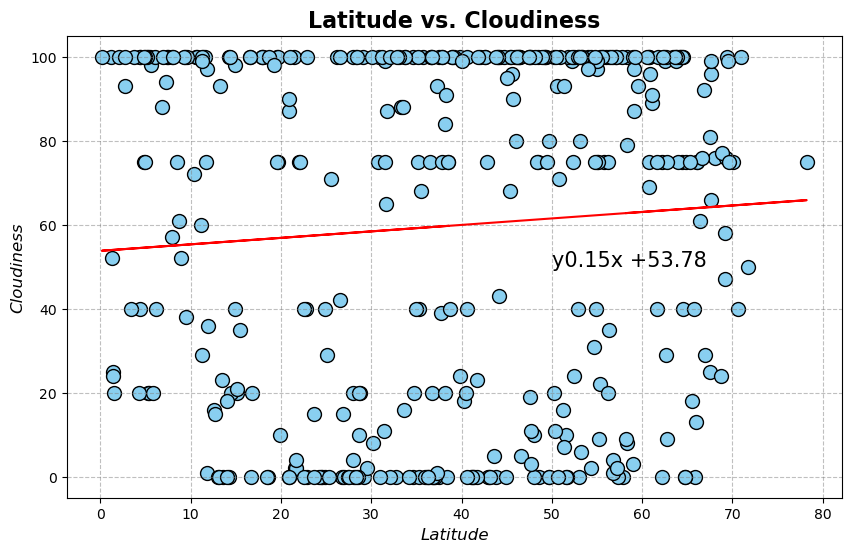

In [57]:
# Southern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness
doRegression(x_values, y_values, "Latitude", "Cloudiness", (50,50))

**Discussion about the linear relationship:** According to this data there is no relation between latidtude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0038013226759089796


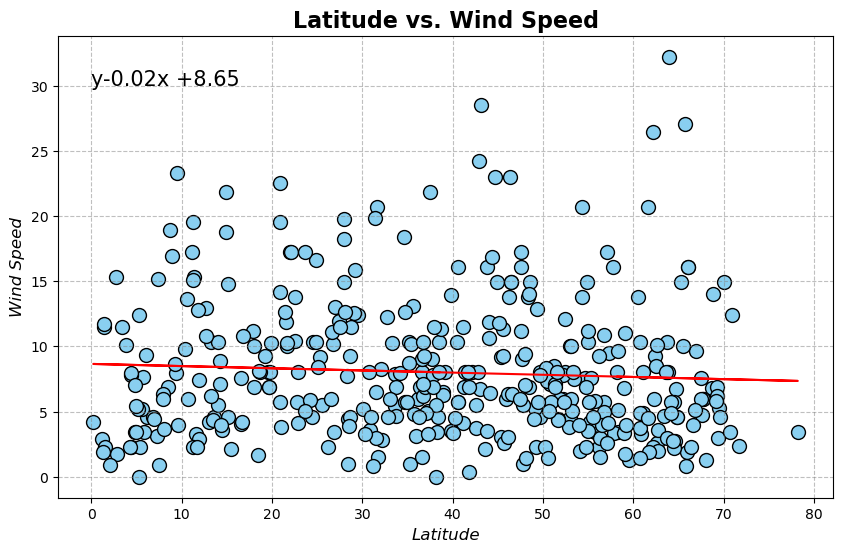

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df['Wind Speed']
doRegression(x_values, y_values, "Latitude", "Wind Speed", (0,30))

The r-squared is: 0.009154860879429207


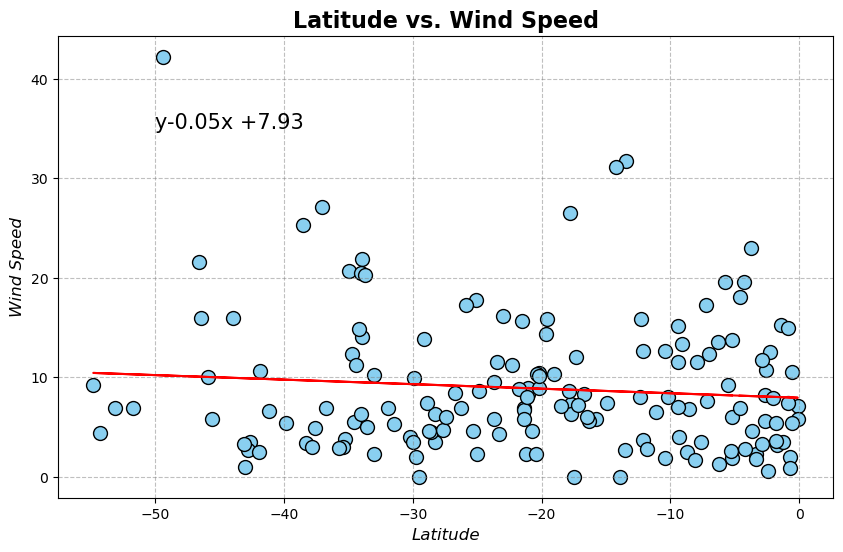

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df['Wind Speed']
doRegression(x_values, y_values, "Latitude", "Wind Speed", (-50,35))

**Discussion about the linear relationship:** According to these scatter plots there is no noticable relation between latitude and wind speed